In [1]:
import tensorflow as tf

# CNN의 기본 개념


## Convolution Layer

이미지를 입력으로 받아 이미지 내의 '특징들을 검출'하는 역할

컨볼루션 레이어의 Output을 우리는 'feature map'이라고 한다.  -> 컨볼루션의 결과 값이 이미지가 가지고 있는 특징을 의미한다고 볼 수 있다.


### 1. kernel(filter)

컨볼루션 연산을 통해 이미지 내의 특징들을 '기억'하는 가중치 텐서


이미지들의 공통적인 특징들을 kernel이 기억하고 있다가 해당 공통적인 특징을 통해 검출된 이미지의 특징을 레이어의 출력인 feature map이라고 한다.


kernel size 3X3, 5X5로 홀수의 크기를 가지며, 크기가 클수록 더 큰 범위, 크기의 특징들을 기억한다.


레이어의 Output인 출력 텐서의 마지막 차원의 크기는 해당 컨볼루션 레이어가 가진 필터(커널)의 수가 된다.


(128, 128, 3)의 크기의 이미지가 들어올 때, 컨볼루션 레이어가 가지는 필터의 수가 64라면, 레이어의 Output의 shape(~, ~, ~, 64)가 된다.



### 2. stride

컨볼루션 연산을 수행하는 커널이 이미지를 얼마나 자세하게 볼 것인가를 결정하는 값. 커널은 공통적인 특징을 기억을 했다가 입력으로 들어오는 이미지의 특징을 반환한다고 설명했다. 특징들을 얼마나 세세하게 검출해낼 것인가를 결정하는 것과 동일한 의미를 가진다.


컨볼루션 연산의 결과인 feature map의 크기를 결정할 수 있다.


### 3. padding

컨볼루션 연산의 결과인 feature map의 크기를 결정하기 위해 사용되는 값


'valid' - padding을 사용하지 않는다.


'same' - 컨볼루션 레이어의 Input shape, Output shape를 동일하게 하기위해 패딩을 추가한다.


## Keras를 통한 Convolution Layer 구현


Dense() -> fully connected layer를 구현하지 않아도 사용할 수 있었다.

Conv2D() -> convolution layer를 미리 구현하여 사용할 수 있도록 제공


```python

tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

```

- filters


    커널의 갯수 -> 해당 컨볼루션 레이어의 마지막 차원의 크기 64 -> output shape (~, ~, ~, 64)


- kernel_size


    커널의 크기 -> 3X3, 5X5 정수값으로 사용합니다. 예를 들어 kernel_size = 3이라면  실제 커널의 사이즈 (3,3)일 것이다.


- strides

    stride의 값을 나타낸다. 기본값은 (1, 1), 정수값을 사용할 수 있다.
    

- padding


    'valid', 'same' 두가지 옵션이 존재한다. 


- activation

    컨볼루션 레이어의 최종적인 결과인 Output에 대해서 활성화 함수를 거친뒤 반환할 것인가에 대해서 결정합니다.

    activation = 'relu'으로 사용시, 컨볼루션 연산을 수행한 결과값에 대해서 relu 활성화 함수를 거친 최종 값을 해당 레이어의 결과값으로 반환합니다.

    옵션을 통해서 컨볼루션 레이어에 끝에 활성화 함수를 추가할 수 있으나 여러 논문에서는 활성화 함수 레이어를 따로 구현하여 사용합니다.



## Activation Layer


컨볼루션 레이어의 결과인 feature map(이미지 내의 특징)에 대해서 활성화 함수를 거치기 위해서 컨볼루션 레이어 뒤에 추가하는 레이어


컨볼루션 - () - activation layer 의 순서는 거의 사실상 하나의 레이어라고 볼 수 있습니다.


선형적인 convolution 연산과정을 수행하는 convolution layer에 대해서 여러 층을 쌓는 효과를 위해 해당 연산들 사이에 비 선형성을 추가하는 함수

선형적인 함수들의 연속에서는 연속된 함수들이 하나의 함수로 표현될 수 있습니다. 

-> 여러 층을 쌓는 효과가 없어지게 된다. 하지만 딥러닝을 사용하는 이유가 선형적인 모델이 풀 수 없는 문제들을 풀어내기위해 사용하는 것이기 때문 

-> 비선형성을 추가함으로써 선형 함수들이 할 수 없는 것들을 해낼 수 있게 된다.


### relu


### sigmoid


## MaxPooling Layer

풀링 레이어의 한 종류, 주로 사용되는 풀링 레이어

컨볼루션 레이어의 결과인 이미지 내의 특징들을 '종합'하는 함수


이미지의 입력(개, 고양이 사진)에서부터 최종적인 분류 출력값(0, 1)을 나타내기위해 필요한 차원축소를 수행


특징들 중에서도 더 중요한 특징들로 간추리기 위한 연산과정이다.


```python
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs
)

```

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNIST

기존 이미지 데이터의 픽셀 값은 [0-255]의 값을 가진다. [0-1]사이의 데이터로 변환하는 작업은 수행해줘야 한다. 대신 배열형태로 변환했던 과정은 생략합니다.

CNN을 구현할 때, 원래 이미지는 3차원의 행렬형태 입니다. (이미지의 너비, 이미지의 높이, 이미지의 채널 수) 3개의 차원으로 이미지를 표현하는데, MNIST의 경우에는 현재 2차원의 행렬형태입니다. (이미지의 너비, 이미지의 높이)이기 때문에 채널 수라는 하나의 차원을 추가해줘야 한다.


- 채널이 존재하지 않는다는 것은 해당 이미지가 흑백이라는 뜻 <-> 3-4개의 채널을 가지면 해당 이미지는 컬러이다.

In [4]:
# 행렬 형태의 이미지를 배열 형태의 이미지로 변환하는 작업
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# 튜플 간의 덧셈
x_train.shape + (1,)

(60000, 28, 28, 1)

In [8]:
# 차원을 하나 추가
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

In [9]:
# 이미지로 다루기 위해서 차원을 1개 추가하였다.
x_train.shape

(60000, 28, 28, 1)

## 구현 방법



convolution layer -> activation layer -> max pooling layer 

-> convolution layer -> activation layer -> max pooling layer 

-> convolution layer -> activation layer -> max pooling layer

-> flatten ->  fully connected layer -> 결과값

In [19]:
# Sequential API로 CNN을 구현해보자.


seq_model = tf.keras.models.Sequential([
    
    # 32는 필터의 갯수, (3,3)은 필터의 크기
    # 데이터 하나의 shape를 의미합니다.
    #  (input_shape - filter + (padding * 2)) / stride + 1 
    # (28 - 3) / 1  + 1 = 26_
    # 최종적인 레이어의 output shape (None, 26, 26, 32)
    tf.keras.layers.Conv2D(32, (5,5), input_shape = (28, 28, 1)),
    
    # activation function 
    tf.keras.layers.ReLU(),
    
    # stride가 2이다. 
    #  (input_shape - filter + (padding * 2)) / stride + 1 
    # (26 - 2) / 2  + 1 =  13 
    # 최종적인 레이어의 output shape (None, 13, 13, 32)
    tf.keras.layers.MaxPooling2D(2),
    
    # 이미지의 크기가 26 -> 13으로 줄어들게 되면 모델이 파악할 수 있는 정보의 크기가 절반으로 줄어든다.
    # maxpooling을 거친 뒤에 output shape가 절반으로 줄어들기 때문에 그만큼 filter수를 2배 증가시켜줘야합니다.
    tf.keras.layers.Conv2D(64, (5,5)),
    
    # activation function 
    tf.keras.layers.ReLU(),
    
    # stride가 2이다.
    tf.keras.layers.MaxPooling2D(2),
    
    # Flatten을 통해서 fully connected layer의 입력으로 들어갈 수 있도록 배열의 형태로 변환한다.
    tf.keras.layers.Flatten(),
    
    # output shape의 크기는 대부분 짝수
    tf.keras.layers.Dense(64),
    
    # activation function 
    tf.keras.layers.ReLU(),
    
    # 최종적인 결과값이 0-9사이의 정수값으로 손글씨를 분류하는 것이기 때문에 
    # softmax란, 각 10개의 output shape를 가지는 출력값을 확률값으로 변환하는 과정
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [20]:
seq_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
re_lu_8 (ReLU)               (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
re_lu_9 (ReLU)               (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

In [21]:
# compile을 통한 학습 루프 정의

seq_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [22]:
# 
seq_model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1423 - accuracy: 0.9559
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0437 - accuracy: 0.9865
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0299 - accuracy: 0.9907
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0229 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0169 - accuracy: 0.9949


In [18]:
seq_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0421 - accuracy: 0.9879


[0.04214546084403992, 0.9879000186920166]

# 5일차 정리


## 모델의 가중치 저장

`save_weights`

`load_weights`

## 모델 전체를 저장

`save`

`load_model`


## CNN을 구현

convolution layer - activation layer - maxpooling layer의 레이어 구조의 연속


In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# 행렬형태의 이미지 데이터 -> 배열의 형태로 반환하는 작업 (X)
# 0-255 -> 0-1사이의 값으로 변경하는 작업

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
import numpy as np

np.unique(x_train)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568628,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313726, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.07450981,
       0.07843138, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196079, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941177, 0.13333334,
       0.13725491, 0.14117648, 0.14509805, 0.14901961, 0.15294118,
       0.15686275, 0.16078432, 0.16470589, 0.16862746, 0.17254902,
       0.1764706 , 0.18039216, 0.18431373, 0.1882353 , 0.19215687,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568628, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313726, 0.24705882, 0.2509804 ,
       0.25490198, 0.25882354, 0.2627451 , 0.26666668, 0.27058825,
       0.27450982, 0.2784314 , 0.28235295, 0.28627452, 0.29019

In [7]:
# CNN 이미지로 사용하기 위해서 차원 1개 추가 (채널 차원)

x_train = x_train.reshape(x_train.shape + (1, ))
x_test = x_test.reshape(x_test.shape + (1, ))

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
# Sequential API를 통해 구현한 간단한 CNN 모델
seq_model = tf.keras.models.Sequential([
    
    # 32는 필터의 갯수, (3,3)은 필터의 크기
    # 데이터 하나의 shape를 의미합니다.
    #  (input_shape - filter + (padding * 2)) / stride + 1 
    # (28 - 3) / 1  + 1 = 26_
    # 최종적인 레이어의 output shape (None, 26, 26, 32)
    tf.keras.layers.Conv2D(32, (5,5), input_shape = (28, 28, 1)),
    
    # activation function 
    tf.keras.layers.ReLU(),
    
    # stride가 2이다. 
    #  (input_shape - filter + (padding * 2)) / stride + 1 
    # (26 - 2) / 2  + 1 =  13 
    # 최종적인 레이어의 output shape (None, 13, 13, 32)
    tf.keras.layers.MaxPooling2D(2),
    
    # 이미지의 크기가 26 -> 13으로 줄어들게 되면 모델이 파악할 수 있는 정보의 크기가 절반으로 줄어든다.
    # maxpooling을 거친 뒤에 output shape가 절반으로 줄어들기 때문에 그만큼 filter수를 2배 증가시켜줘야합니다.
    tf.keras.layers.Conv2D(64, (5,5)),
    
    # activation function 
    tf.keras.layers.ReLU(),
    
    # stride가 2이다.
    tf.keras.layers.MaxPooling2D(2),
    
    # Flatten을 통해서 fully connected layer의 입력으로 들어갈 수 있도록 배열의 형태로 변환한다.
    tf.keras.layers.Flatten(),
    
    # output shape의 크기는 대부분 짝수
    tf.keras.layers.Dense(64),
    
    # activation function 
    tf.keras.layers.ReLU(),
    
    # 최종적인 결과값이 0-9사이의 정수값으로 손글씨를 분류하는 것이기 때문에 
    # softmax란, 각 10개의 output shape를 가지는 출력값을 확률값으로 변환하는 과정
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [11]:
# compile을 통한 학습 루프 정의
seq_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [12]:
# 학습 진행
seq_model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1360 - accuracy: 0.9575
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0432 - accuracy: 0.9867
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0300 - accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0222 - accuracy: 0.9932
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0181 - accuracy: 0.9939


In [15]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
re_lu (ReLU)                 (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

# Sequential -> Functional

In [13]:
# functional API로 구현

inputs = tf.keras.layers.Input((28, 28, 1))

x = tf.keras.layers.Conv2D(32, (5,5))(inputs)

x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64, (5,5))(x)

x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64)(x)

x = tf.keras.layers.ReLU()(x)

y = tf.keras.layers.Dense(10, activation = 'softmax')(x)


func_model = tf.keras.Model(inputs = inputs, outputs= y)

In [14]:
func_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
re_lu_4 (ReLU)               (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)         

## CNN 구조의 간단한 구현

CNN은 convolution - activaion - max pooling 레이어를 하나의 큰 레이어로 본다면 이 큰 레이어를 여러개 쌓은 모델로 볼 수 있습니다.

convolution - activaion - max pooling 레이어를 subclassing방법으로 하나의 레이어로 구현해두면, 모델을 정의할 때 좀 더 간단해질 수 있습니다.

- max pooling 까지 거친 output shape는 높이와 너비 모두 절반으로 줄어든다. (32, 32) -> (16, 16)

- 다음 convolution - activaion - max pooling 레이어는 filter의 수가 2배가 되어야 한다. 이를 통해 각 레이어의 정보(연산의 복잡도)를 유지한다. 



In [16]:
from tensorflow.keras.layers import Layer, Conv2D, ReLU, MaxPooling2D


class CNN_Block(Layer):
    
    def __init__(self, filters, kernel_size):
        
        super().__init__()
        
        #(32, 32, 3) -> (높이, 너비, 필터의 갯수) 
        self.conv = Conv2D(
            filters, 
            kernel_size
        )
        # activation
        self.relu = ReLU()
        
        # max pooling
        self.pool = MaxPooling2D(2)
        
        
    def call(self, X):
        x = self.conv(X)
        x = self.relu(x)
        y = self.pool(x)
        return y 

In [17]:
# Sequential API
seq_block_model = tf.keras.models.Sequential([
    CNN_Block(32, (5,5)),
    CNN_Block(64, (5,5)),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [18]:
seq_block_model.trainable_variables

ValueError: Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

## build()

sequential API를 통해 모델을 구현하는 경우, build(), fit()의 과정을 수행하지 않은경우, 내부의 가중치 텐서들이 생성 및 초기화되지 않았다.

최초 Input shape에 맞춰서 가중치 텐서들이 초기화가 가능 -> input shape를 전달하는 함수 buid(), fit() 을 수행해야만 내부 모델의 구조를 확인할 수 있다.

Input shape를 build()함수를 통해 전달할 때는 단순 하나의 데이터의 shape를 전달하는 것이 아니라, 학습에 사용될 batch size의 크기 또한 전달해줘야 한다.

In [19]:
seq_block_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
# build 과정을 수행하여 가중치 텐서들을 생성(초기화)
# input shape를 전달
seq_block_model.build((32, 28, 28, 1))

In [23]:
seq_block_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cnn__block (CNN_Block)       multiple                  832       
_________________________________________________________________
cnn__block_1 (CNN_Block)     multiple                  51264     
_________________________________________________________________
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  65600     
_________________________________________________________________
re_lu_8 (ReLU)               multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  650       
Total params: 118,346
Trainable params: 118,346
Non-trainable params: 0
________________________________________________

# Sequential -> Functional 

48분까지 스스로 해보세요.

In [ ]:
# Sequential API
seq_block_model = tf.keras.models.Sequential([
    CNN_Block(32, (5,5)),
    CNN_Block(64, (5,5)),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [24]:
# Functional API 

# 데이터 하나의 shape를 정의
inputs = tf.keras.layers.Input((28, 28, 1))
x = CNN_Block(32, (5,5))(inputs)
x = CNN_Block(64, (5,5))(x)  
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64)(x)
x = tf.keras.layers.ReLU()(x)
y = tf.keras.layers.Dense(10, activation = 'softmax')(x)

func_model = tf.keras.models.Model(inputs, outputs = y)

In [25]:
func_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
cnn__block_2 (CNN_Block)     (None, 12, 12, 32)        832       
_________________________________________________________________
cnn__block_3 (CNN_Block)     (None, 4, 4, 64)          51264     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                65600     
_________________________________________________________________
re_lu_11 (ReLU)              (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [26]:
# compile을 통한 학습 루프 정의
func_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [27]:
func_model.fit(x_train, y_train, batch_size = 32, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1286 - accuracy: 0.9612
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0430 - accuracy: 0.9869
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0286 - accuracy: 0.9909
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0227 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0162 - accuracy: 0.9948


In [30]:
func_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0301 - accuracy: 0.9906


[0.030117785558104515, 0.9905999898910522]

# 실제 데이터를 사용하여 모델을 평가

이미지를 다루는 라이브러리인 opencv를 사용

In [33]:
!pip install opencv-python

In [35]:
import cv2
import matplotlib.pyplot as plt

In [36]:
image = cv2.imread('./education_images/7.jpeg', cv2.IMREAD_GRAYSCALE)

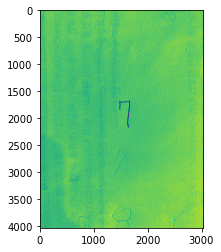

In [37]:
plt.imshow(image)

In [38]:
x_train[0].shape

(28, 28, 1)

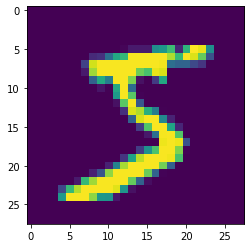

In [39]:
plt.imshow(x_train[0])

In [40]:
# 7이라는 숫자를 제외하고는 모두 검은색으로 바꾸는 전처리
# 100보다 큰 값을 가지는 픽셀을 255로 바꾸고, 나머지  픽셀은 0으로 바꾼다.
_, thresh_image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)

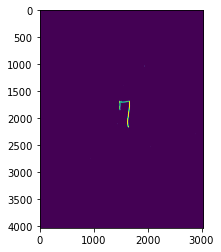

In [41]:
plt.imshow(thresh_image)

In [48]:
thresh_image = thresh_image[1500: 2400, 1200: 1900]

In [51]:
thresh_image = thresh_image[120: 800, 200: 550]

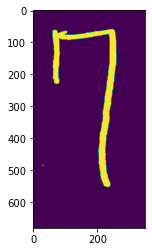

In [52]:
plt.imshow(thresh_image)

In [53]:
thresh_image.shape
#(680 , 350) -> (28, 28)

(680, 350)

In [54]:
# interpolation -> 이미지를 리사이징 하는 경우, 픽셀값이 어떠한 방법으로 결정될 것인가?
resize_thresh_image = cv2.resize(thresh_image, (28, 28), interpolation = cv2.INTER_AREA)

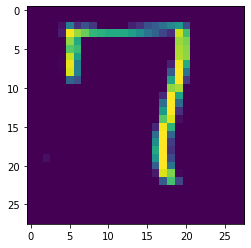

In [55]:
plt.imshow(resize_thresh_image)

In [56]:
resize_thresh_image[resize_thresh_image > 10] = 255

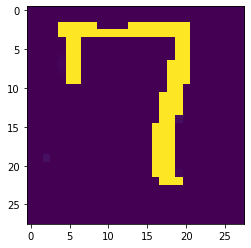

In [57]:
plt.imshow(resize_thresh_image)

In [59]:
resize_thresh_image = resize_thresh_image /255

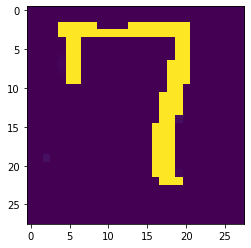

In [60]:
plt.imshow(resize_thresh_image)

In [62]:
np.argmax(func_model.predict(resize_thresh_image.reshape(1, 28, 28)))

2

# MNIST를 학습한 모델

## 한계

실제 생활, 현실에서 사용하는 데이터의 형태와 텐서플로우가 제공하는 데이터인 MNIST가 동떨어져있다. 비현실적으로 잘 정제된 데이터 셋이기 때문에 우리가 현실에서 사용하는 이미지에 적용하기에는 매우 큰 문제가 있다.

MNIST를 통해 구현된 모델은 오로지 학습을 위한 모델이다.

# Fashion mnist

한 패션 회사의 제품 이미지

- 60000 개의 (28, 28) 크기의 이미지

- 10개의 class 

In [63]:
from tensorflow.keras.datasets import fashion_mnist

In [64]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [65]:
x_train.shape

(60000, 28, 28)

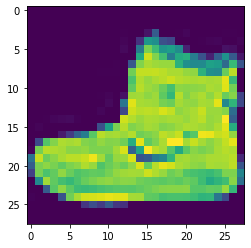

In [66]:
plt.imshow(x_train[0])

In [67]:
# 현재 데이터셋의 차원의 갯수가 (28, 28) 두개이기 때문에 이미지로 사용하기 위해 차원을 하나 추가
x_train = x_train.reshape(x_train.shape + (1, ))
x_test = x_test.reshape(x_test.shape + (1, ))

In [68]:
# 0- 255의 값을 0-1 
x_train = x_train.astype("float32") / 255

In [69]:
x_test = x_test.astype("float32") / 255

In [72]:
from tensorflow.keras.layers import Flatten, Dense, ReLU, Softmax

In [73]:
# Sequential API
middle_model = tf.keras.models.Sequential([
    CNN_Block(32, (5,5)),
    CNN_Block(64, (5,5)),    
    Flatten(),
    Dense(64),
    ReLU(),
    Dense(10),
    Softmax()
])

In [74]:
middle_model.build((32, 28, 28, 1))

In [75]:
middle_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cnn__block_4 (CNN_Block)     (32, 12, 12, 32)          832       
_________________________________________________________________
cnn__block_5 (CNN_Block)     (32, 4, 4, 64)            51264     
_________________________________________________________________
flatten_4 (Flatten)          (32, 1024)                0         
_________________________________________________________________
dense_8 (Dense)              (32, 64)                  65600     
_________________________________________________________________
re_lu_14 (ReLU)              (32, 64)                  0         
_________________________________________________________________
dense_9 (Dense)              (32, 10)                  650       
_________________________________________________________________
softmax (Softmax)            (32, 10)                 

In [76]:
# Sequential API
small_model = tf.keras.models.Sequential([
    Flatten(),
    Dense(64),
    ReLU(),
    Dense(32),
    ReLU(),
    Dense(10),
    Softmax()
])

In [77]:
small_model.build((32, 28, 28, 1))
small_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (32, 784)                 0         
_________________________________________________________________
dense_10 (Dense)             (32, 64)                  50240     
_________________________________________________________________
re_lu_15 (ReLU)              (32, 64)                  0         
_________________________________________________________________
dense_11 (Dense)             (32, 32)                  2080      
_________________________________________________________________
re_lu_16 (ReLU)              (32, 32)                  0         
_________________________________________________________________
dense_12 (Dense)             (32, 10)                  330       
_________________________________________________________________
softmax_1 (Softmax)          (32, 10)                 

In [82]:
# Sequential API
large_model = tf.keras.models.Sequential([
    CNN_Block(64, (3,3)),
    CNN_Block(128, (3,3)),
    CNN_Block(256, (3,3)),
    Flatten(),
    Dense(64),
    ReLU(),
    Dense(32),
    ReLU(),
    Dense(10),
    Softmax()
])

In [83]:
large_model.build((32, 28, 28, 1))
large_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cnn__block_12 (CNN_Block)    (32, 13, 13, 64)          640       
_________________________________________________________________
cnn__block_13 (CNN_Block)    (32, 5, 5, 128)           73856     
_________________________________________________________________
cnn__block_14 (CNN_Block)    (32, 1, 1, 256)           295168    
_________________________________________________________________
flatten_8 (Flatten)          (32, 256)                 0         
_________________________________________________________________
dense_19 (Dense)             (32, 64)                  16448     
_________________________________________________________________
re_lu_30 (ReLU)              (32, 64)                  0         
_________________________________________________________________
dense_20 (Dense)             (32, 32)                 

In [ ]:
models = [small_model, middle_model, large_model]

train_result = [
    [],
    [],
    []
]


In [90]:
# 각 모델을 학습
for i, model in enumerate(models):
    # compile을 통한 학습 루프 정의
    model.compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ['accuracy']
    )
    # 학습 과정을 담고 있는 객체를 history
    history = model.fit(x_train, y_train, epochs = 5)

    # history.history['accuracy'][-1] -> 학습을 진행한 결과에서 정확도를 들고와서 맨마지막 정확도를 train_result
    train_result[i].append(history.history['accuracy'][-1])

Epoch 1/5
1875/1875 [==============================] - 1s 474us/step - loss: 0.2529 - accuracy: 0.9054
Epoch 2/5
1875/1875 [==============================] - 1s 477us/step - loss: 0.2430 - accuracy: 0.9082
Epoch 3/5
1875/1875 [==============================] - 1s 470us/step - loss: 0.2382 - accuracy: 0.9099
Epoch 4/5
1875/1875 [==============================] - 1s 472us/step - loss: 0.2323 - accuracy: 0.9124
Epoch 5/5
1875/1875 [==============================] - 1s 476us/step - loss: 0.2257 - accuracy: 0.9153
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1258 - accuracy: 0.9518
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1149 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1055 - accuracy: 0.9593
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0977 - accuracy: 0.9633
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0

In [91]:
# 모델을 평가
for model in models:
    model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4509 - accuracy: 0.8908


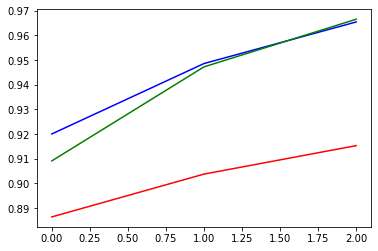

In [92]:
# 학습과정을 그래프로 나타내보자

# 학습 과정을 train_result라는 배열에 담아두었기 때문에 그 값을 그래프로 

plt.plot(train_result[0], c = 'r')
plt.plot(train_result[1], c = 'b')
plt.plot(train_result[2], c = 'g')

# cifar - 10 

물체를 분류하는 데이터셋, 분류 모델에 대한 벤치마킹을 위한 데이터 

- 50000장의 32X32의 컬러 이미지 데이터

In [93]:
from tensorflow.keras.datasets import cifar10

In [94]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 10s 0us/step


In [95]:
# (60000, 28, 28) 데이터 -> 컬러 이미지 데이터는 채널을 의미하는 차원이 1개 추가된 (50000, 32, 32, 3) 데이터
x_train.shape

(50000, 32, 32, 3)

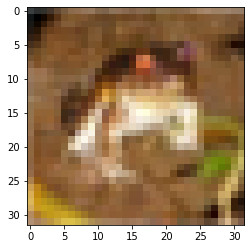

In [97]:
plt.imshow(x_train[0])

In [98]:
# 255로 나누는 작업
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# cifar10 데이터셋의 경우, 28 -> 32로 커졌고, 채널의 수도 3개 증가하였다. 
# 이미지가 모델에 제공할 수 있는 정보가 증가하였다.
# 복잡한 문제를 해결할 때, 모델의 크기에 따라 결과는 어떻게 변할 것인가?

In [103]:
# Sequential API
middle_model = tf.keras.models.Sequential([
    CNN_Block(32, (5,5)),
    CNN_Block(64, (5,5)),    
    Flatten(),
    Dense(64),
    ReLU(),
    Dense(10),
    Softmax()
])

# Sequential API
small_model = tf.keras.models.Sequential([
    Flatten(),
    Dense(64),
    ReLU(),
    Dense(32),
    ReLU(),
    Dense(10),
    Softmax()
])

# Sequential API
large_model = tf.keras.models.Sequential([
    CNN_Block(64, (3,3)),
    CNN_Block(128, (3,3)),
    CNN_Block(256, (3,3)),
    Flatten(),
    Dense(64),
    ReLU(),
    Dense(32),
    ReLU(),
    Dense(10),
    Softmax()
])

In [104]:
models = [small_model, middle_model, large_model]

train_result = [
    [],
    [],
    []
]

In [110]:
# 각 모델을 학습
for i, model in enumerate(models):
    # compile을 통한 학습 루프 정의
    model.compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ['accuracy']
    )
    # 학습 과정을 담고 있는 객체를 history
    history = model.fit(x_train, y_train, epochs = 5)

    # history.history['accuracy'][-1] -> 학습을 진행한 결과에서 정확도를 들고와서 맨마지막 정확도를 train_result
    train_result[i].append(history.history['accuracy'][-1])

Epoch 1/5
1563/1563 [==============================] - 1s 744us/step - loss: 1.5247 - accuracy: 0.4497
Epoch 2/5
1563/1563 [==============================] - 1s 742us/step - loss: 1.5137 - accuracy: 0.4578
Epoch 3/5
1563/1563 [==============================] - 1s 747us/step - loss: 1.5130 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 1s 744us/step - loss: 1.5042 - accuracy: 0.4582
Epoch 5/5
1563/1563 [==============================] - 1s 746us/step - loss: 1.4977 - accuracy: 0.4630
Epoch 1/5
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6108 - accuracy: 0.7858
Epoch 2/5
1563/1563 [==============================] - 18s 12ms/step - loss: 0.5758 - accuracy: 0.7938
Epoch 3/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.5475 - accuracy: 0.8077
Epoch 4/5
1563/1563 [==============================] - 18s 12ms/step - loss: 0.5200 - accuracy: 0.8161
Epoch 5/5
1563/1563 [==============================] - 18s 12ms/step - lo

In [108]:
# 모델을 평가
for model in models:
    model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.8885 - accuracy: 0.7274


In [111]:
# 모델을 3번째 평가
for model in models:
    model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.1023 - accuracy: 0.7204


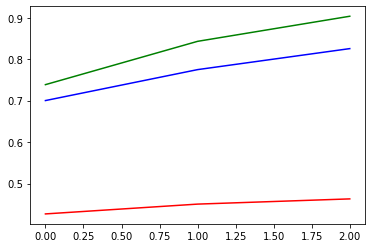

In [112]:
# 학습과정을 그래프로 나타내보자

# 학습 과정을 train_result라는 배열에 담아두었기 때문에 그 값을 그래프로 

plt.plot(train_result[0], c = 'r')
plt.plot(train_result[1], c = 'b')
plt.plot(train_result[2], c = 'g')

# 모델 학습의 결과


## 1. fashion mnist


### 학습 데이터 

일정 크기 이상의 모델은 96%이상의 정확도를 달성하였다.


### 평가 데이터

중간 크기의 모델의 평가 데이터의 정확도가 가장 높았다. 

여러 번의 epoch를 수행하였음에도 평가 데이터의 정확도는 높아지지 않았습니다. 

(5 -> 10 -> 15) 모두 70퍼센트의 정확도가 유지되었습니다. 

- 학습 데이터의 정확도는 증가하지만 평가 데이터의 정확도는 그대로 유지되는 경우를 '오버피팅'이라고 한다.

오버피팅을 가장 단순하게 해결하는 방법은 모델의 복잡도를 낮추는 것 -> 레이어의 수를 감소시킴을 통해 모델이 가지는 파라미터 수를 감소시키는 것.


## 2. cifar 10

위의 fashion mnist 데이터보다 더 복잡한 문제로 볼 수 있다. 이미지가 모델에게 제공할 수 있는 정보의 크기가 증가하였다.

복잡한 문제에 대해서는 복잡한 모델이 더 효과적일 것인가?


### 학습 데이터

5 -> 10 -> 15 epoch를 증가시키면서 학습 데이터의 정확도가 증가하였다. 이 때, 학습데이터의 정확도 증가 추이가 감소하지 않았기 때문에 모델이 데이터가 제공하는 정보에 대해서 완전히 학습되지 않았다. 곧 epochs를 증가시켜야 한다.


### 평가 데이터 

epoch가 10일때까지 평가 데이터의 정확도가 증가하였으나 15의 경우에는 평가 데이터의 정확도가 유지되었다. 이 후, 학습을 추가로 진행하더라도 학습 데이터의 정확도는 증가할 수 있으나 평가 데이터의 정확도는 오르지 않을 수 있다. 해당 임계치를 벗어난 학습의 경우, 오버피팅을 발생 시킬 수 있다.


우리가 구현한 모델의 학습데이터의 정확도, 평가 데이터의 정확도를 통해 학습의 진행여부를 판단해야한다. 

1. 학습 데이터와 평가 데이터 모두 증가하는 경우, epochs를 증가시켜서 학습 데이터에 대한 학습을 더 진행시켜야 한다.

2. 학습 데이터의 정확도는 증가하나, 평가 데이터의 정확도는 감소하거나 유지되는 경우에는 오버피팅이 발생할 수 있으므로, 학습을 중지하거나, 오버피팅을 피할 수 있도록 모델을 수정하여야 한다.

모델을 구현할 때는 여러가지 크기의 모델을 미리 구현하고 난 뒤, 평가를 통해 최종적으로 모델을 선정해야한다.


# 표정을 인식하는 모델 구현